# Liczba zgonów podzielona przez liczbę zakażeń dla różnych krajów

Patrz owid02.ipynb: Liczba hospitalizacji podzielona przez liczbę zakażeń dla różnych krajów - problemy:
1. Trudno wybrać przesunięcie hospitalizacji względem przypadków, bo dla różnych krajów i różnych okresów są różne.
2. Skoro Radek mówi, że hospitalizacje covidowe to nie to samo, co choroba na covid, może lepiej zamiast hospitalizacji dać zgony



In [1]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from share.helper_functions import set_legend_right


In [5]:
url_cases = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_cases.csv"
url_deaths = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_deaths.csv"

df_cases=pd.read_csv(url_cases)
df_deaths=pd.read_csv(url_deaths)

In [41]:
countries = [
    'Poland',
    'Denmark',
    'United Kingdom',
    'United States'
    ]


In [45]:
dfc = {}
indicator = 'Cases'
for country in countries:
    dfc[country] = pd.DataFrame

    dfc[country] = df_cases[['date', country]].copy(deep=True)
    dfc[country]['date'] = pd.to_datetime(dfc[country]['date'], format = "%Y-%m-%d")

    dfc[country].index = dfc[country]['date']
    dfc[country].index.name = 'Date'
    dfc[country].drop('date', axis = 1 , inplace=True)
    dfc[country].rename({country:indicator}, axis=1, inplace=True)
    dfc[country]= dfc[country].apply(pd.to_numeric)
    # display(country, dfc[country])

dfd = {}
indicator = 'Deaths'
for country in countries:
    dfd[country] = pd.DataFrame

    dfd[country] = df_deaths[['date', country]].copy(deep=True)
    dfd[country]['date'] = pd.to_datetime(dfd[country]['date'], format = "%Y-%m-%d")

    dfd[country].index = dfd[country]['date']
    dfd[country].index.name = 'Date'
    dfd[country].drop('date', axis = 1 , inplace=True)
    dfd[country].rename({country:indicator}, axis=1, inplace=True)
    dfd[country]= dfd[country].apply(pd.to_numeric)    
    # display(country, dfd[country])

df = {}
for country in countries:
    df[country] = pd.DataFrame
    df[country] = pd.concat([dfc[country], dfd[country]], axis=1)
    # display(df[country])

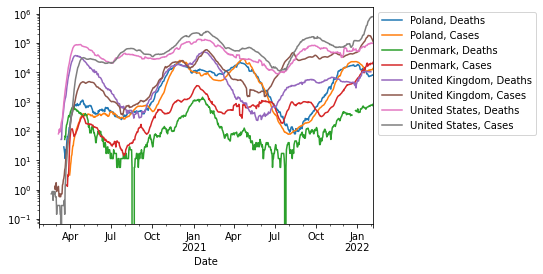

In [46]:
shift = 21

fig, ax = plt.subplots()
for country in countries:

    (df[country]['Deaths'].rolling(7).mean() *40).plot(ax=ax, label=country+', Deaths',\
         logy=True) 
    df[country]['Cases'].rolling(7).mean().shift(shift).plot(ax=ax, label=country+ ', Cases')
    
# ax.set_title('Daily hospital occupancy divided by the 7-day moving average of daily new cases')
# ax.set_ylabel('Daily hospital occupancy / Cases')
legendparams = {} #{'labels':countries}
legendparams = set_legend_right(legendparams)
ax.legend(**legendparams);

Dofitować przesunięcia dla krajów. Czy dla wszystkich wyjdą takie same?

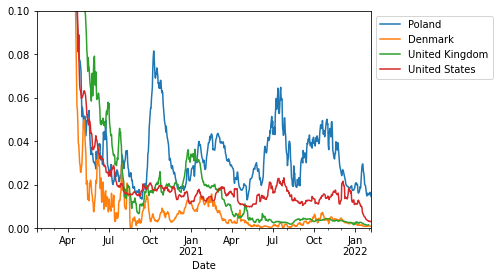

In [56]:
shift = 21

fig, ax = plt.subplots()
for country in countries:

    # (df[country]['Deaths'].rolling(7).mean() *40).plot(ax=ax, label=country+', Deaths',\
        #  logy=True) 
    # df[country]['Cases'].rolling(7).mean().shift(shift).plot(ax=ax, label=country+ ', Cases')
    df1 = df[country]['Deaths'].rolling(7).mean()  / df[country]['Cases'].shift(shift).rolling(7).mean() 
    df1.plot(ax=ax, label=country) 
    
# ax.set_title('Daily hospital occupancy divided by the 7-day moving average of daily new cases')
# ax.set_ylabel('Daily hospital occupancy / Cases')
legendparams = {} #{'labels':countries}
legendparams = set_legend_right(legendparams)
ax.set_ylim(0,0.1)
ax.legend(**legendparams);

Dlaczego na początku takie duże wartości?